In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/machine vision system project'

In [ ]:
#diseased_dir = os.path.join(PATH, 'Diseased')
#healthy_dir = os.path.join(PATH, 'Healthy')

In [ ]:
data_dir = PATH

In [ ]:
batch_size = 3
sz=(100,100)

#### 데이터 split

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            validation_split=0.3,
                                                            subset="training",
                                                            interpolation='bicubic',
                                                            image_size=sz,
                                                            seed=1204)

test_and_val_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            validation_split=0.3,
                                                            subset="validation",
                                                            image_size=sz,
                                                            interpolation='bicubic',
                                                                   seed=1204)

Found 421 files belonging to 2 classes.
Using 295 files for training.
Found 421 files belonging to 2 classes.
Using 126 files for validation.


In [ ]:
print(train_dataset.class_names)
print(test_and_val_dataset.class_names)
class_names = train_dataset.class_names

['Diseased', 'Healthy']
['Diseased', 'Healthy']


#### split validation set

In [ ]:
test_batches_num = tf.data.experimental.cardinality(test_and_val_dataset)
val_dataset = test_and_val_dataset.take(test_batches_num // 5)
test_dataset = test_and_val_dataset.skip(test_batches_num // 5)

In [ ]:
print('Number of available test and validation batches: %d' %test_batches_num)

Number of available test and validation batches: 42


In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 8
Number of test batches: 34


In [ ]:
tf.data.experimental.cardinality(val_dataset).numpy().astype("uint8")

8

In [ ]:
list(val_dataset.as_numpy_iterator())

[(array([[[[ 64.,  68.,   0.],
           [ 71.,  75.,   0.],
           [ 74.,  79.,   0.],
           ...,
           [ 97.,  84.,   6.],
           [ 97.,  86.,   4.],
           [102.,  92.,   7.]],
  
          [[ 65.,  69.,   0.],
           [ 71.,  75.,   0.],
           [ 78.,  83.,   3.],
           ...,
           [ 96.,  85.,   6.],
           [ 98.,  87.,   5.],
           [100.,  92.,   7.]],
  
          [[ 64.,  68.,   0.],
           [ 70.,  74.,   0.],
           [ 78.,  82.,   5.],
           ...,
           [ 93.,  82.,   3.],
           [ 95.,  87.,   4.],
           [ 97.,  91.,   7.]],
  
          ...,
  
          [[ 25.,  34.,   7.],
           [ 22.,  31.,   4.],
           [ 19.,  27.,   3.],
           ...,
           [  9.,   8.,   3.],
           [  9.,   8.,   3.],
           [  9.,   8.,   3.]],
  
          [[ 26.,  35.,   6.],
           [ 23.,  32.,   5.],
           [ 19.,  27.,   3.],
           ...,
           [  8.,   7.,   2.],
           [  8., 

tf.data.experimental.cardinality
- Returns the *cardinality* of dataset, if known. (데이터셋의 원소갯수를 알려줌)
* cardinality : the number of elements in a set or other grouping, as a property of that grouping.

#### show dataset

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

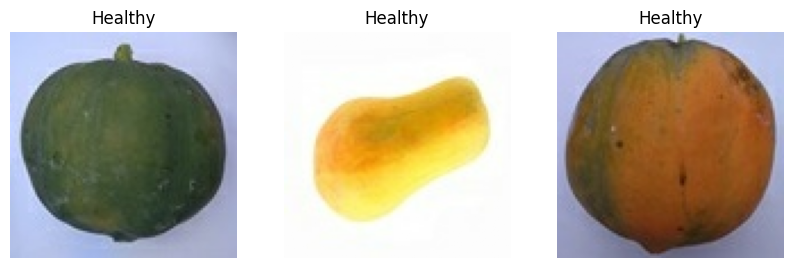

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    plt.imshow(images[i]/255)
    plt.title(class_names[labels[i]])
    plt.axis("off")

tf.data.Dataset
- take(n)
- Creates a Dataset with at most 'count' 갯수의 elements from this dataset.
- 최대 '개수'개의 요소로 데이터세트를 생성합니다.

In [ ]:
list(train_dataset.as_numpy_iterator())[0][1]  # 첫번째 배치를 참조 = label 부분

array([0, 0, 1], dtype=int32)

In [ ]:
test_dataset_batch1 = list(test_dataset.take(1))[0]
test_dataset_batch1
'''
test_dataset_batch1 = list(test_dataset.as_numpy_iterator())[0]
test_dataset_batch1[0][0] # image
'''

(<tf.Tensor: shape=(3, 100, 100, 3), dtype=float32, numpy=
 array([[[[190., 201., 233.],
          [191., 202., 234.],
          [192., 200., 236.],
          ...,
          [144., 145., 176.],
          [144., 145., 176.],
          [141., 142., 173.]],
 
         [[192., 200., 236.],
          [192., 200., 236.],
          [192., 200., 236.],
          ...,
          [145., 146., 176.],
          [144., 145., 175.],
          [141., 142., 172.]],
 
         [[195., 200., 242.],
          [192., 200., 239.],
          [193., 201., 238.],
          ...,
          [144., 145., 173.],
          [144., 145., 173.],
          [141., 142., 170.]],
 
         ...,
 
         [[193., 207., 252.],
          [194., 208., 253.],
          [196., 209., 254.],
          ...,
          [134., 139., 169.],
          [134., 139., 169.],
          [134., 139., 169.]],
 
         [[193., 207., 252.],
          [193., 207., 252.],
          [195., 208., 253.],
          ...,
          [136., 141., 171.]

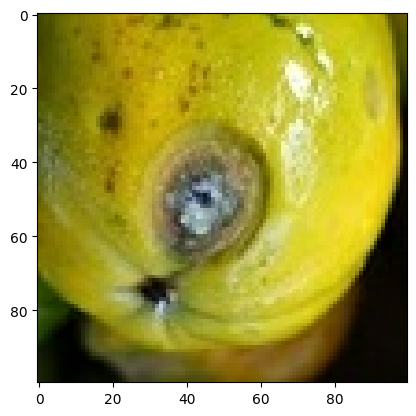

In [ ]:
plt.imshow(test_dataset_batch1[0][0]/255)

### 모델 훈련시키기

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # lightness to range in [0,1]
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same',input_shape=sz),
    tf.keras.layers.MaxPooling2D(strides=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes),
    tf.keras.layers.Softmax()
    ])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

Epoch 1/3
99/99 [==============================] - 14s 99ms/step - loss: 0.2768 - accuracy: 0.8881 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 2/3
99/99 [==============================] - 9s 90ms/step - loss: 0.0978 - accuracy: 0.9661 - val_loss: 0.3154 - val_accuracy: 0.9583
Epoch 3/3
99/99 [==============================] - 10s 100ms/step - loss: 0.4067 - accuracy: 0.9153 - val_loss: 0.0481 - val_accuracy: 1.0000


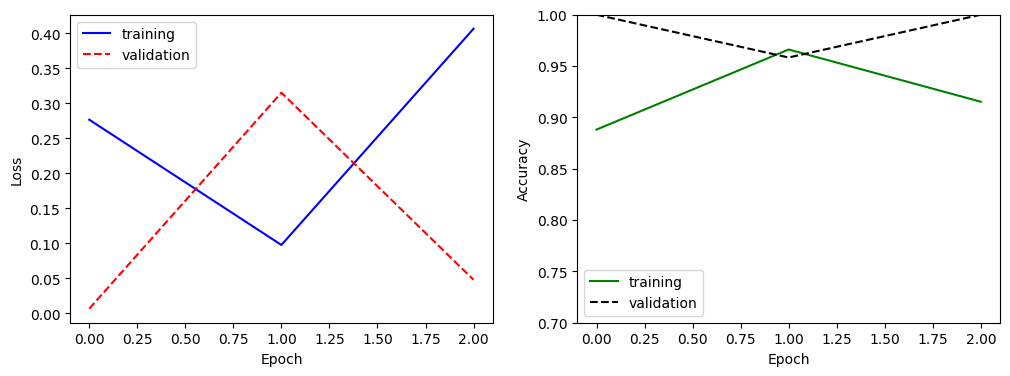

In [ ]:
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='training')
plt.plot(history.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.7, 1), plt.legend()
plt.show()

In [ ]:
history.history

{'loss': [0.27677813172340393, 0.09782513976097107, 0.406735897064209],
 'accuracy': [0.8881356120109558, 0.9661017060279846, 0.9152542352676392],
 'val_loss': [0.006747635547071695, 0.3153701722621918, 0.04811384156346321],
 'val_accuracy': [1.0, 0.9583333134651184, 1.0]}

In [ ]:
 score = model.evaluate(test_dataset)

34/34 [==============================] - 1s 27ms/step - loss: 0.0537 - accuracy: 0.9902


In [ ]:
test_dataset_batch1 = list(test_dataset.take(1))[0]
test_dataset_batch1

(<tf.Tensor: shape=(3, 100, 100, 3), dtype=float32, numpy=
 array([[[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.]

1/1 [==============================] - 0s 32ms/step


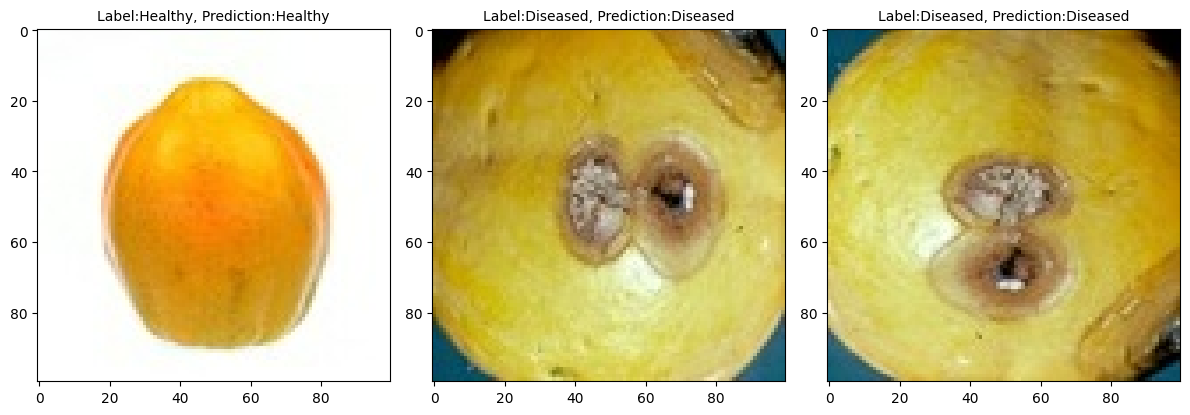

In [ ]:
test_dataset_batch1 = list(test_dataset.take(1))[0]
#image_batch, label_batch = next(iter(test_dataset))

prediction = model.predict(test_dataset_batch1[0])
predicted_labels = np.argmax(prediction, axis=1)

#test_labels = np.argmax(test_dataset, axis=1)
test_labels = test_dataset_batch1[1]

count = 0

plt.figure(figsize=(12,8))
for n in range(3):
     count += 1
     plt.subplot(1, 3, count)
     plt.imshow(test_dataset_batch1[0][n]/255)
     #plt.imshow(test_dataset_batch1[0][n].reshape(28, 28, 3)/255, interpolation='bicubic')
     tmp = "Label:" + class_names[test_labels[n]] + ", Prediction:" + class_names[predicted_labels[n]]
     plt.title(tmp,fontdict = {'fontsize' : 10})

plt.tight_layout()
plt.show()

In [ ]:
prediction

array([[0.03853271, 0.9614673 ],
       [0.04772344, 0.9522765 ],
       [0.02524399, 0.974756  ]], dtype=float32)

## Evaluation

In [ ]:
test_labels.numpy()

array([1, 0, 0], dtype=int32)

In [ ]:
predicted_labels

array([1, 0, 0])

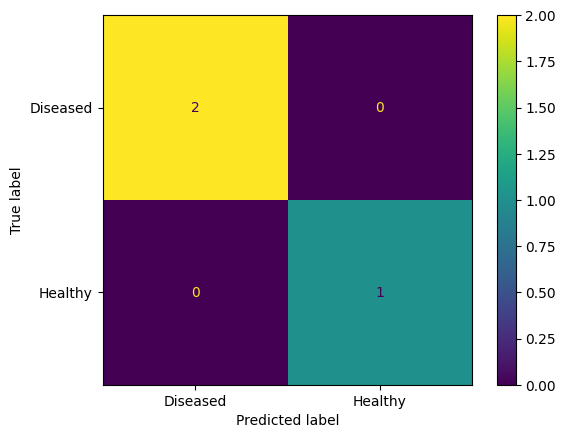

In [ ]:
cm = confusion_matrix(test_labels.numpy(), predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()